# Proyek UTS PMDPM

<b>Harap jangan menghapus cell dan komentar yang diberikan!</b>

Setiap cell markdown dan code akan berisi instruksi pengerjaan Proyek UTS PMDPM

Dalam notebook ini Anda akan diminta untuk membuat sebuah proyek Pembelajaran Mesin menggunakan dataset yang sudah disediakan. Proyek akan terdiri dari proses inisialisasi, data loading, data cleansing, feature engineering, modelling dan evaluasi model. Pada bagian akhir silahkan berikan laporan singkat dari proyek yang sudah dikerjakan

## Studi Kasus

Dataset: Stroke Prediction Dataset (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) 

Deskripsi: Menurut WHO, stroke adalah penyebab kematian nomor 2 di dunia, sekitar 11% dari total kematian. Dataset ini digunakan untuk memprediksi apakah pasien memiliki kemungkinan terkena stroke berdasarkan input seperti gender, usia, penyakit bawaan, dan status merokok [3]. Setiap baris data menyediakan informasi relevan mengenai pasien. 

Informasi atribut: 

1) id: unique identifier 

2) gender: "Male", "Female" or "Other" 

3) age: age of the patient 

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension 

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 

6) ever_married: "No" or "Yes" 

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" 

8) Residence_type: "Rural" or "Urban" 

9) avg_glucose_level: average glucose level in blood 

10) bmi: body mass index 

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* 

12) stroke: 1 if the patient had a stroke or 0 if not 

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient 

## Penjelasan Tugas

Terapkan pemrosesan dataset dari loading, data cleansing (jika perlu), data scaling, feature selection, hingga evaluasi model secara sederhana menggunakan code yang sudah dipelajari dalam latihan-latihan dan tugas.

### Inisialisasi

Bagian berikut berisi import library yang dibutuhkan

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#loading data yang akan diolah
# from google.colab import files

# uploaded = files.upload()

df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
#menampilkan 20 baris data teratas
df_stroke.head(20)

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (7).csv


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Data Loading

Bagian berikut berisi proses data loading (boleh dengan file upload atau dengan mount drive), jangan lupa tampilkan 20 baris data teratas!

### Data Cleansing

Bagian berikut berisi proses pembersihan data (jika diperlukan, minimal cek apakah ada data yang kosong atau duplikat)

In [224]:
#bersihkan dataset menggunakan metode yang sudah dipelajari
miss_value = df_stroke.isnull().sum().sort_values(ascending=False)
miss_value[miss_value > 0]


bmi    201
dtype: int64

In [225]:
#melihat berapa banyak data yang bernilai nan/kosong
df_stroke['bmi'].value_counts(dropna=False)

NaN     201
28.7     41
28.4     38
27.6     37
26.7     37
       ... 
11.5      1
40.6      1
53.9      1
97.6      1
14.9      1
Name: bmi, Length: 419, dtype: int64

<Axes: xlabel='bmi'>

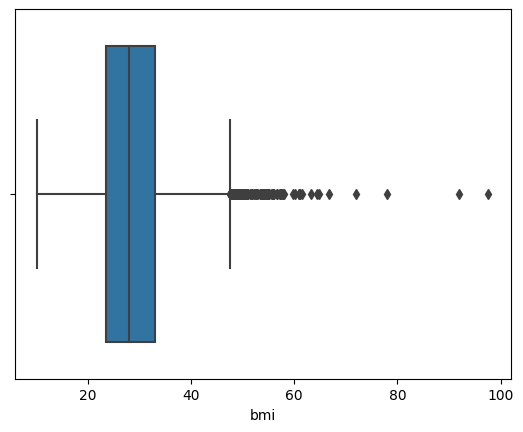

In [226]:
sns.boxplot(data=df_stroke, x='bmi')

In [227]:
med_bmi = df_stroke['bmi'].median()
print(med_bmi)

28.1


In [228]:
df_stroke['bmi'] = df_stroke['bmi'].fillna(med_bmi)
df_stroke.bmi.value_counts(dropna=False)

28.1    230
28.7     41
28.4     38
26.7     37
27.6     37
       ... 
48.7      1
49.2      1
51.0      1
49.4      1
14.9      1
Name: bmi, Length: 418, dtype: int64

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


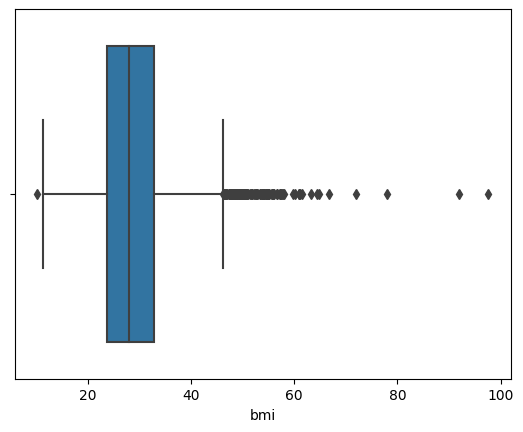

In [229]:
sns.boxplot(data=df_stroke, x='bmi')
df_stroke.head(20)

In [230]:
cols = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type',
        'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
df_stroke = df_stroke[cols]
df_stroke.columns = df_stroke.columns.str.lower()
df_stroke.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [231]:
df_stroke.info()
df_stroke.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [232]:
df_stroke.head()
print(df_stroke.shape)
cols_to_check = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type',
                 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
df_check = df_stroke[~df_stroke[cols_to_check].duplicated(keep='last')]
df_check.shape

(5110, 12)


(5110, 12)

In [233]:
duplicate = df_stroke.duplicated()
df_stroke.loc[duplicate == True]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke


### Data Visualization

Dalam proses visualisasi data, silahkan visualisasikan feature menggunakan plot yang sesuai agar mendapat insight dari data dengan menjawab pertanyaan-pertanyaan berikut:

    untuk sub A:
    1. Bagaimana komposisi jumlah pasien laki-laki dan perempuan?
    2. Bagaimana sebaran usia antara kelompok pasien yang menderita hipertensi dan yang sehat?
    3. Bagaimana perbandingan sebaran nilai rerata glukosa dalam darah antara pasien yang stroke dengan yang sehat?

    untuk sub B:
    1. Bagaimana komposisi jumlah pasien yang tinggal di urban dan rural?
    2. Bagaimana sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat?
    3. Bagaimana perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok?

1. Bagaimana komposisi jumlah pasien yang tinggal di urban dan rural?
- Plot 1: Pada data stroke terdapat 2600 pasien yang tinggal di Urban dan 2500 pasien yang tinggal di Rural. Komposisi jumlah pasiennya banyak yang di rural.
- Plot 2: Komposisi jumlah pasien pada data stroke yang tinggal di Urban dan Rural, pasien yang tinggal di Urban lebih rentan terkena penyakit stroke dibandingkan pasien yang tinggal di Rural.

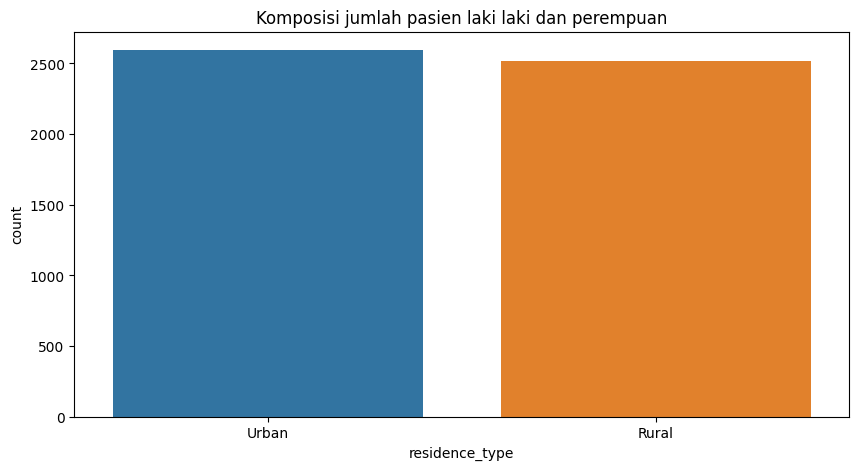

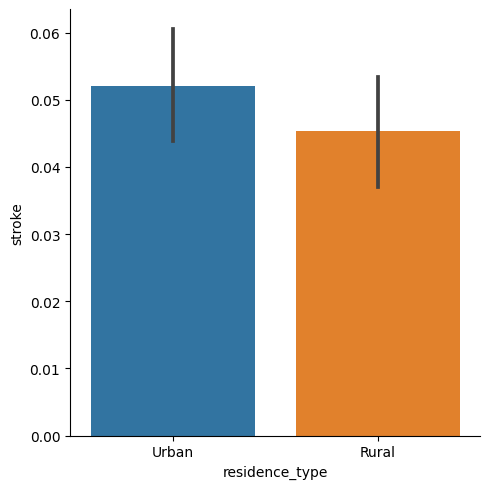

In [234]:
#visualisasi fitur menggunakan metode yang sudah dipelajari
plt.figure(figsize=(10, 5))
sns.countplot(x='residence_type', data=df_stroke)
plt.title("Komposisi jumlah pasien laki laki dan perempuan")
sns.catplot(data=df_stroke, x='residence_type', y='stroke', kind='bar')


2. Bagaimana sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat?
- Pada nilai BMI terdapat 2 jenis kelompok yaitu kelompok yang menderita penyakit jantung dan kelompok yang sehat, nilai BMI kelompok yang menderita penyakit jantung lebih sedikit dibandingkan dengan kelompok yang sehat

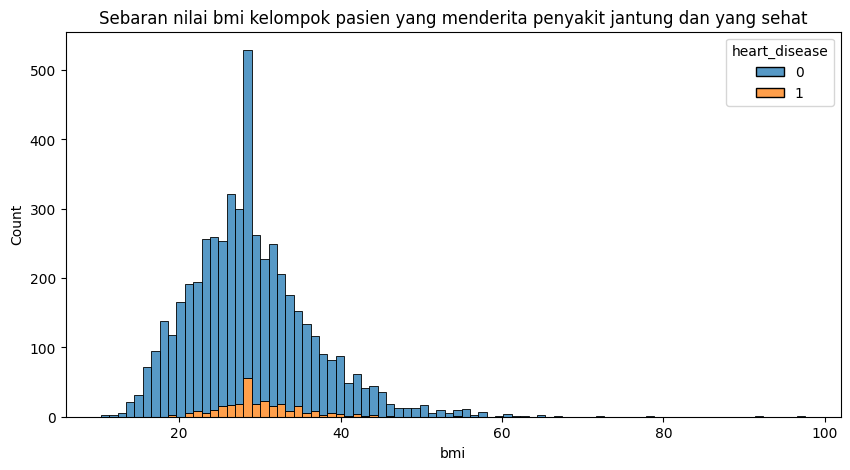

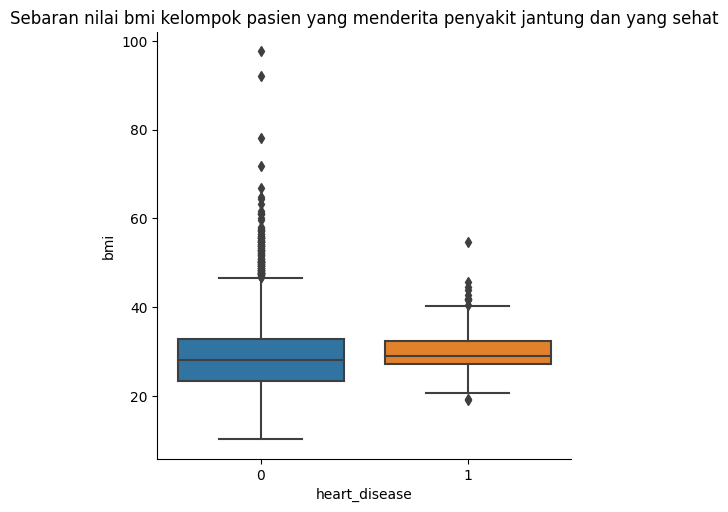

In [235]:
#visualisasi fitur menggunakan metode yang sudah dipelajari
plt.figure(figsize=(10, 5))
sns.histplot(data=df_stroke, x='bmi', hue='heart_disease', multiple='stack')
plt.title("Sebaran nilai bmi kelompok pasien yang menderita penyakit jantung dan yang sehat")
plt.show()
sns.catplot(data=df_stroke, x='heart_disease', y='bmi', kind='box')
plt.title("Sebaran nilai bmi kelompok pasien yang menderita penyakit jantung dan yang sehat")
plt.show()

3. Bagaimana perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok?
- Dapat disimpulkan dari plot bahwa jumlah pasien yang menderita stroke dulunya sering merokok dan sampai sekarang masih merokok

<Figure size 1000x500 with 0 Axes>

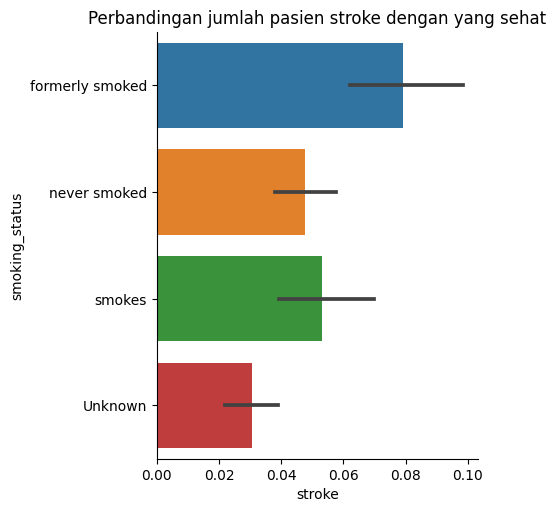

In [236]:
#visualisasi fitur menggunakan metode yang sudah dipelajari
plt.figure(figsize=(10, 5))
sns.catplot(data=df_stroke, x='stroke', y='smoking_status', kind='bar')
plt.title("Perbandingan jumlah pasien stroke dengan yang sehat")
plt.show()

### Deskripsi Data Visualization
Berikan keterangan atau deskripsi singkat mengenai informasi yang diperoleh dari visualisasi data tersebut. Jawablah pertanyaan di atas pada cell markdown ini!

1. Bagaimana komposisi jumlah pasien yang tinggal di urban dan rural?
- Plot 1: Pada data stroke terdapat 2600 pasien yang tinggal di Urban dan 2500 pasien yang tinggal di Rural. Komposisi jumlah pasiennya banyak yang di rural.
- Plot 2: Komposisi jumlah pasien pada data stroke yang tinggal di Urban dan Rural, pasien yang tinggal di Urban lebih rentan terkena penyakit stroke dibandingkan pasien yang tinggal di Rural.

2. Bagaimana sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat?
- Pada nilai BMI terdapat 2 jenis kelompok yaitu kelompok yang menderita penyakit jantung dan kelompok yang sehat, nilai BMI kelompok yang menderita penyakit jantung lebih sedikit dibandingkan dengan kelompok yang sehat

3. Bagaimana perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok?
- Dapat disimpulkan dari plot bahwa jumlah pasien yang menderita stroke dulunya sering merokok dan sampai sekarang masih merokok

### Data Preparation and Scaling

Lakukan train-test split dan data scaling dengan ketentuan:  

    Untuk sub A: random_state train_test_split gunakan 2 digit terakhir NPM terbesar di sub kelompok, gunakan StandardScaler  

    Untuk sub B: random_state train_test_split gunakan 2 digit terakhir NPM terkecil di sub kelompok,gunakan MinMaxScaler 

In [237]:
#train-test split dan data scaling
#NPM terkecil : Veno (0816)

x = df_stroke.drop('stroke', axis=1)
y = df_stroke['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)
print(x_train.shape)
print(x_test.shape)

(3577, 11)
(1533, 11)


In [238]:
cols_category = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

Transformer = make_column_transformer(
    (OneHotEncoder(), cols_category),
    remainder='passthrough'
)

x_train_enc = Transformer.fit_transform(x_train)
x_test_enc = Transformer.transform(x_test)

df_train_enc = pd.DataFrame(x_train_enc, columns=Transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(x_test_enc, columns=Transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__gender_Other,onehotencoder__ever_married_No,onehotencoder__ever_married_Yes,onehotencoder__work_type_Govt_job,onehotencoder__work_type_Never_worked,onehotencoder__work_type_Private,onehotencoder__work_type_Self-employed,onehotencoder__work_type_children,...,onehotencoder__smoking_status_Unknown,onehotencoder__smoking_status_formerly smoked,onehotencoder__smoking_status_never smoked,onehotencoder__smoking_status_smokes,remainder__id,remainder__age,remainder__hypertension,remainder__heart_disease,remainder__avg_glucose_level,remainder__bmi
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,68627.0,80.00,1.0,1.0,175.29,31.5
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,40460.0,68.00,1.0,1.0,247.51,40.5
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1231.0,62.00,0.0,0.0,73.44,23.4
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,68003.0,46.00,1.0,0.0,73.72,28.1
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,2538.0,5.00,0.0,0.0,105.18,28.1
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,11573.0,19.00,0.0,0.0,72.39,28.1
6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,24421.0,30.00,0.0,0.0,113.08,41.8
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,56277.0,38.00,0.0,0.0,83.80,24.2
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,53660.0,57.00,0.0,0.0,108.53,19.4
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,40951.0,1.24,0.0,0.0,77.33,19.2


In [239]:
mm_scaler = MinMaxScaler()

mm_scaler.fit(x_train_enc)
x_train_mmscaled = mm_scaler.transform(x_train_enc)
x_test_mmscaled = mm_scaler.transform(x_test_enc)

print('X_train per-feature minimum sebelum scaling :\n {}', format(x_train_enc.min(axis=0)))
print('X_train per-feature maximum sebelum scaling :\n {}', format(x_train_enc.max(axis=0)))
print('X_train per-feature minimum setelah scaling :\n {}', format(x_train_mmscaled.min(axis=0)))
print('X_train per-feature maximum setelah scaling :\n {}', format(x_train_mmscaled.max(axis=0)))

X_train per-feature minimum sebelum scaling :
 {} [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.   67.    0.08  0.    0.   55.12 11.3 ]
X_train per-feature maximum sebelum scaling :
 {} [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 7.2940e+04 8.2000e+01
 1.0000e+00 1.0000e+00 2.7174e+02 9.7600e+01]
X_train per-feature minimum setelah scaling :
 {} [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
X_train per-feature maximum setelah scaling :
 {} [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Feature Selection

Melakukan feature selection menggunakan metode statistik univariat dan SelectFromModel untuk dibandingkan. Untuk jumlah feature, silahkan bereksperimen untuk mendapatkan jumlah performa model terbaik.

    Untuk sub A: gunakan SelectKBest dan RFE dengan ketentuan:
    jumlah feature minimal 5 dan model menggunakan RandomForestClassifier(n_estimators=100, random_state=dua digit terakhir NPM terkecil dalam sub kelompok).
    Terapkan SelectKBest dan RFE pada dataset yang belum diubah dan sudah diubah dengan StandardScaler. 

    Untuk sub B: gunakan SelectPercentile dan SelectFromModel dengan ketentuan:
    persentil minimal 30% dan model menggunakan RandomForestClassifier(n_estimators=200, random_state=dua digit terakhir NPM terbesar dalam sub kelompok).
    Terapkan SelectPercentile dan SelectFromModel pada dataset yang belum diubah dan sudah diubah dengan MinMaxScaler.

In [240]:
#NPM terbesar : Jean (1427)
#Select percentile data belum diubah
SP = SelectPercentile(percentile=30)
SP.fit(x_train_enc, y_train)

x_train_sp = SP.transform(x_train_enc)
x_test_sp = SP.transform(x_test_enc)

print("X_train_Belum diubah : {} ".format(x_train_enc.shape))
print("X_train_Select percentile: {}".format(x_train_sp.shape))

print("\nX_test_Awal belum diubah : {}".format(x_test_enc.shape))
print("X_test_Select_Percentile : {}".format(x_test_sp.shape))


X_train_Belum diubah : (3577, 22) 
X_train_Select percentile: (3577, 7)

X_test_Awal belum diubah : (1533, 22)
X_test_Select_Percentile : (1533, 7)


Feature yang diambil :  ['onehotencoder__ever_married_No' 'onehotencoder__ever_married_Yes'
 'onehotencoder__work_type_children' 'remainder__age'
 'remainder__hypertension' 'remainder__heart_disease'
 'remainder__avg_glucose_level']


([], [])

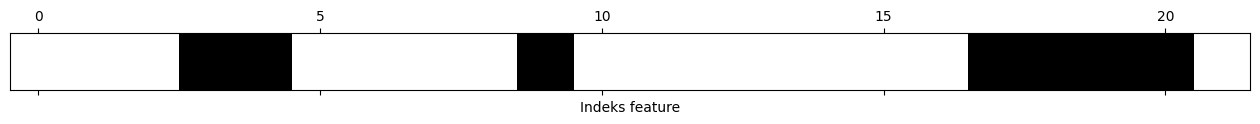

In [241]:
mask = SP.get_support()
#mengambil feature yang mau diambil

print("Feature yang diambil : ", df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Indeks feature")
plt.yticks(())

In [242]:
#Select percentile data sudah di scaling menggunakan MinMax Scaler

SP = SelectPercentile(percentile=30)
SP.fit(x_train_mmscaled, y_train)

x_train_sp = SP.transform(x_train_mmscaled)
x_test_sp = SP.transform(x_test_mmscaled)

print("X_train_Awal minMax Scaler : {} ".format(x_train_enc.shape))
print("X_train_Select percentile: {}".format(x_train_sp.shape))

print("\nX_test_Awal minMax Scaler : {}".format(x_test_mmscaled.shape))
print("X_test_Select_Percentile : {}".format(x_test_sp.shape))

X_train_Awal minMax Scaler : (3577, 22) 
X_train_Select percentile: (3577, 7)

X_test_Awal minMax Scaler : (1533, 22)
X_test_Select_Percentile : (1533, 7)


Feature yang dipilih :  ['onehotencoder__ever_married_No' 'onehotencoder__ever_married_Yes'
 'onehotencoder__work_type_children' 'remainder__age'
 'remainder__hypertension' 'remainder__heart_disease'
 'remainder__avg_glucose_level']


([], [])

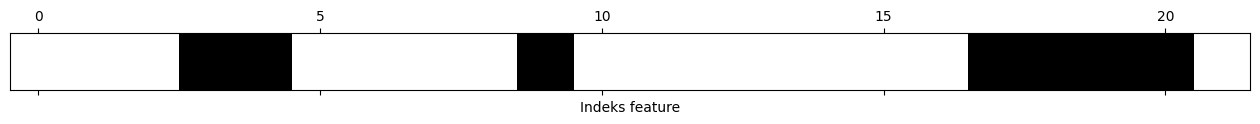

In [243]:
mask = SP.get_support()

print("Feature yang dipilih : ", df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Indeks feature")
plt.yticks(())

In [244]:
#Select From Model Data Belum Diubah

SelectM = SelectFromModel(
    RandomForestClassifier(n_estimators=200, random_state=27),
    threshold='median'
)

SelectM.fit(x_train_enc, y_train)
x_train_smodel = SelectM.transform(x_train_enc)
x_test_smodel = SelectM.transform(x_test_enc)

print("X_train_Awal belum diubah : {}".format(x_train_enc.shape))
print("X_train_Select_From_Model : {}\n".format(x_train_smodel.shape))

print("X_test_Awal belum diubah : {}".format(x_test_enc.shape))
print("X_test_Select_From_Model : {}".format(x_test_smodel.shape))

X_train_Awal belum diubah : (3577, 22)
X_train_Select_From_Model : (3577, 11)

X_test_Awal belum diubah : (1533, 22)
X_test_Select_From_Model : (1533, 11)


In [ ]:
mask = SelectM.get_support()

print("Feature yang dipilih : ", df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("indeks feature")
plt.yticks(())  #%% md
# Proyek UTS PMDPM

## Studi Kasus

Dataset: Stroke Prediction Dataset (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

Deskripsi: Menurut WHO, stroke adalah penyebab kematian nomor 2 di dunia, sekitar 11% dari total kematian. Dataset ini digunakan untuk memprediksi apakah pasien memiliki kemungkinan terkena stroke berdasarkan input seperti gender, usia, penyakit bawaan, dan status merokok [3]. Setiap baris data menyediakan informasi relevan mengenai pasien.

Informasi atribut:

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Penjelasan Tugas

Terapkan pemrosesan dataset dari loading, data cleansing (jika perlu), data scaling, feature selection, hingga evaluasi model secara sederhana menggunakan code yang sudah dipelajari dalam latihan-latihan dan tugas.

### Inisialisasi

Bagian berikut berisi import library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#loading data yang akan diolah
from google.colab import files

uploaded = files.upload()

df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
#menampilkan 20 baris data teratas
df_stroke.head(20)

### Data Loading

Bagian berikut berisi proses data loading (boleh dengan file upload atau dengan mount drive), jangan lupa tampilkan 20 baris data teratas!

### Data Cleansing

Bagian berikut berisi proses pembersihan data (jika diperlukan, minimal cek apakah ada data yang kosong atau duplikat)

In [ ]:
#bersihkan dataset menggunakan metode yang sudah dipelajari
miss_value = df_stroke.isnull().sum().sort_values(ascending=False)
miss_value[miss_value > 0]


In [ ]:
#melihat berapa banyak data yang bernilai nan/kosong
df_stroke['bmi'].value_counts(dropna=False)

In [ ]:
sns.boxplot(data=df_stroke, x='bmi')

In [ ]:
med_bmi = df_stroke['bmi'].median()
print(med_bmi)

In [ ]:
df_stroke['bmi'] = df_stroke['bmi'].fillna(med_bmi)
df_stroke.bmi.value_counts(dropna=False)

In [ ]:
sns.boxplot(data=df_stroke, x='bmi')
df_stroke.head(20)

In [ ]:
cols = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type',
        'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
df_stroke = df_stroke[cols]
df_stroke.columns = df_stroke.columns.str.lower()
df_stroke.head(20)

In [ ]:
df_stroke.info()
df_stroke.describe()

In [ ]:
df_stroke.head()
print(df_stroke.shape)
cols_to_check = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type',
                 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
df_check = df_stroke[~df_stroke[cols_to_check].duplicated(keep='last')]
df_check.shape

In [ ]:
duplicate = df_stroke.duplicated()
df_stroke.loc[duplicate == True]

### Data Visualization

Dalam proses visualisasi data, silahkan visualisasikan feature menggunakan plot yang sesuai agar mendapat insight dari data dengan menjawab pertanyaan-pertanyaan berikut:

    untuk sub A:
    1. Bagaimana komposisi jumlah pasien laki-laki dan perempuan?
    2. Bagaimana sebaran usia antara kelompok pasien yang menderita hipertensi dan yang sehat?
    3. Bagaimana perbandingan sebaran nilai rerata glukosa dalam darah antara pasien yang stroke dengan yang sehat?

    untuk sub B:
    1. Bagaimana komposisi jumlah pasien yang tinggal di urban dan rural?
    2. Bagaimana sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat?
    3. Bagaimana perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok?

1. Bagaimana komposisi jumlah pasien yang tinggal di urban dan rural?
- Plot 1: Pada data stroke terdapat 2600 pasien yang tinggal di Urban dan 2500 pasien yang tinggal di Rural. Komposisi jumlah pasiennya banyak yang di rural.
- Plot 2: Komposisi jumlah pasien pada data stroke yang tinggal di Urban dan Rural, pasien yang tinggal di Urban lebih rentan terkena penyakit stroke dibandingkan pasien yang tinggal di Rural.

In [ ]:
#visualisasi fitur menggunakan metode yang sudah dipelajari
plt.figure(figsize=(10, 5))
sns.countplot(x='residence_type', data=df_stroke)
plt.title("Komposisi jumlah pasien laki laki dan perempuan")
sns.catplot(data=df_stroke, x='residence_type', y='stroke', kind='bar')


2. Bagaimana sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat?
- Pada nilai BMI terdapat 2 jenis kelompok yaitu kelompok yang menderita penyakit jantung dan kelompok yang sehat, nilai BMI kelompok yang menderita penyakit jantung lebih sedikit dibandingkan dengan kelompok yang sehat

In [ ]:
#visualisasi fitur menggunakan metode yang sudah dipelajari
plt.figure(figsize=(10, 5))
sns.histplot(data=df_stroke, x='bmi', hue='heart_disease', multiple='stack')
plt.title("Sebaran nilai bmi kelompok pasien yang menderita penyakit jantung dan yang sehat")
plt.show()
sns.catplot(data=df_stroke, x='heart_disease', y='bmi', kind='box')
plt.title("Sebaran nilai bmi kelompok pasien yang menderita penyakit jantung dan yang sehat")
plt.show()

3. Bagaimana perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok?
- Dapat disimpulkan dari plot bahwa jumlah pasien yang menderita stroke dulunya sering merokok dan sampai sekarang masih merokok

In [ ]:
#visualisasi fitur menggunakan metode yang sudah dipelajari
plt.figure(figsize=(10, 5))
sns.catplot(data=df_stroke, x='stroke', y='smoking_status', kind='bar')
plt.title("Perbandingan jumlah pasien stroke dengan yang sehat")
plt.show()

### Deskripsi Data Visualization
Berikan keterangan atau deskripsi singkat mengenai informasi yang diperoleh dari visualisasi data tersebut. Jawablah pertanyaan di atas pada cell markdown ini!

1. Bagaimana komposisi jumlah pasien yang tinggal di urban dan rural?
- Plot 1: Pada data stroke terdapat 2600 pasien yang tinggal di Urban dan 2500 pasien yang tinggal di Rural. Komposisi jumlah pasiennya banyak yang di rural.
- Plot 2: Komposisi jumlah pasien pada data stroke yang tinggal di Urban dan Rural, pasien yang tinggal di Urban lebih rentan terkena penyakit stroke dibandingkan pasien yang tinggal di Rural.

2. Bagaimana sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat?
- Pada nilai BMI terdapat 2 jenis kelompok yaitu kelompok yang menderita penyakit jantung dan kelompok yang sehat, nilai BMI kelompok yang menderita penyakit jantung lebih sedikit dibandingkan dengan kelompok yang sehat

3. Bagaimana perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok?
- Dapat disimpulkan dari plot bahwa jumlah pasien yang menderita stroke dulunya sering merokok dan sampai sekarang masih merokok

### Data Preparation and Scaling

Lakukan train-test split dan data scaling dengan ketentuan:

    Untuk sub A: random_state train_test_split gunakan 2 digit terakhir NPM terbesar di sub kelompok, gunakan StandardScaler

    Untuk sub B: random_state train_test_split gunakan 2 digit terakhir NPM terkecil di sub kelompok,gunakan MinMaxScaler

In [ ]:
#train-test split dan data scaling
#NPM terkecil : Veno (0816)

x = df_stroke.drop('stroke', axis=1)
y = df_stroke['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)
print(x_train.shape)
print(x_test.shape)

In [ ]:
cols_category = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

Transformer = make_column_transformer(
    (OneHotEncoder(), cols_category),
    remainder='passthrough'
)

x_train_enc = Transformer.fit_transform(x_train)
x_test_enc = Transformer.transform(x_test)

df_train_enc = pd.DataFrame(x_train_enc, columns=Transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(x_test_enc, columns=Transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

In [ ]:
mm_scaler = MinMaxScaler()

mm_scaler.fit(x_train_enc)
x_train_mmscaled = mm_scaler.transform(x_train_enc)
x_test_mmscaled = mm_scaler.transform(x_test_enc)

print('X_train per-feature minimum sebelum scaling :\n {}', format(x_train_enc.min(axis=0)))
print('X_train per-feature maximum sebelum scaling :\n {}', format(x_train_enc.max(axis=0)))
print('X_train per-feature minimum setelah scaling :\n {}', format(x_train_mmscaled.min(axis=0)))
print('X_train per-feature maximum setelah scaling :\n {}', format(x_train_mmscaled.max(axis=0)))

### Feature Selection

Melakukan feature selection menggunakan metode statistik univariat dan SelectFromModel untuk dibandingkan. Untuk jumlah feature, silahkan bereksperimen untuk mendapatkan jumlah performa model terbaik.

    Untuk sub A: gunakan SelectKBest dan RFE dengan ketentuan:
    jumlah feature minimal 5 dan model menggunakan RandomForestClassifier(n_estimators=100, random_state=dua digit terakhir NPM terkecil dalam sub kelompok).
    Terapkan SelectKBest dan RFE pada dataset yang belum diubah dan sudah diubah dengan StandardScaler.

    Untuk sub B: gunakan SelectPercentile dan SelectFromModel dengan ketentuan:
    persentil minimal 30% dan model menggunakan RandomForestClassifier(n_estimators=200, random_state=dua digit terakhir NPM terbesar dalam sub kelompok).
    Terapkan SelectPercentile dan SelectFromModel pada dataset yang belum diubah dan sudah diubah dengan MinMaxScaler.

In [ ]:
#NPM terbesar : Jean (1427)
#Select percentile data belum diubah
SP = SelectPercentile(percentile=30)
SP.fit(x_train_enc, y_train)

x_train_sp = SP.transform(x_train_enc)
x_test_sp = SP.transform(x_test_enc)

print("X_train_Belum diubah : {} ".format(x_train_enc.shape))
print("X_train_Select percentile: {}".format(x_train_sp.shape))

print("\nX_test_Awal belum diubah : {}".format(x_test_enc.shape))
print("X_test_Select_Percentile : {}".format(x_test_sp.shape))


In [ ]:
mask = SP.get_support()
#mengambil feature yang mau diambil

print("Feature yang diambil : ", df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Indeks feature")
plt.yticks(())

In [ ]:
#Select percentile data sudah di scaling menggunakan MinMax Scaler

SP = SelectPercentile(percentile=30)
SP.fit(x_train_mmscaled, y_train)

x_train_sp = SP.transform(x_train_mmscaled)
x_test_sp = SP.transform(x_test_mmscaled)

print("X_train_Awal minMax Scaler : {} ".format(x_train_enc.shape))
print("X_train_Select percentile: {}".format(x_train_sp.shape))

print("\nX_test_Awal minMax Scaler : {}".format(x_test_mmscaled.shape))
print("X_test_Select_Percentile : {}".format(x_test_sp.shape))

In [ ]:
mask = SP.get_support()

print("Feature yang dipilih : ", df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Indeks feature")
plt.yticks(())

In [ ]:
#Select From Model Data Belum Diubah

SelectM = SelectFromModel(
    RandomForestClassifier(n_estimators=200, random_state=27),
    threshold='median'
)

SelectM.fit(x_train_enc, y_train)
x_train_smodel = SelectM.transform(x_train_enc)
x_test_smodel = SelectM.transform(x_test_enc)

print("X_train_Awal belum diubah : {}".format(x_train_enc.shape))
print("X_train_Select_From_Model : {}\n".format(x_train_smodel.shape))

print("X_test_Awal belum diubah : {}".format(x_test_enc.shape))
print("X_test_Select_From_Model : {}".format(x_test_smodel.shape))

In [ ]:
mask = SelectM.get_support()

print("Feature yang dipilih : ", df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("indeks feature")
plt.yticks(())

In [ ]:
#Select From Model Data Sudah Discaling menggunakan Minmax Scaler

SelectM = SelectFromModel(
    RandomForestClassifier(n_estimators=200, random_state=27),
    threshold='median'
)

SelectM.fit(x_train_mmscaled, y_train)
x_train_smodel = SelectM.transform(x_train_mmscaled)
x_test_smodel = SelectM.transform(x_test_mmscaled)

print("X_train_Awal Minmax Scaler : {}".format(x_train_mmscaled.shape))
print("X_train_Select_From_Model : {}".format(x_train_smodel.shape))
print("\nX_test_Awal Minmax Scaler : {}".format(x_test_mmscaled.shape))
print("X_test_Select_From_Model : {}".format(x_test_smodel.shape))

In [ ]:
mask = SelectM.get_support()
print("Feature yang terpilih : ", df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("indeks feature")
plt.yticks(())

In [ ]:
def plot_feature_importances(classifier, dataset, feat_names):
    n_feat = dataset.shape[1]
    plt.barh(range(n_feat), classifier.feature_importances_, align='center')
    plt.yticks(np.arange(n_feat), feat_names)
    plt.xlabel('Feature Importances')
    plt.ylabel('Features')
    plt.ylim(-1, n_feat)
    plt.show()


plot_feature_importances(SelectM.estimator_, df_train_enc, df_train_enc.columns)

### Modelling

Menggunakan 2 algoritme pembelajaran mesin untuk klasifikasi. Eksplorasi pengaturan parameter yang ada pada algoritme yang akan Anda gunakan, tidak terbatas pada 1-2 parameter saja supaya optimal (selain random_state). Silahkan bereksperimen untuk parameter seperti n_estimators, max_depth, dll. agar mendapat akurasi terbaik.

Ketentuan:

    Sub A:
    1. DecisionTreeClassifier(random_state= dua digit terakhir NPM terbesar dalam sub kelompok, max_depth=bebas,criterion='entropy')
    2. LogisticRegression(C=bebas, max_iter=10000, class_weight='balanced')`

    Sub B:
    1. K-Nearest Neighbors(n_neighbors=bebas, weights='distance')
    2. LinearSVC(C=bebas, class_weight='balanced')

Total ada 6 model yang harus diuji dengan rincian:

<table>
<thead>
  <tr>
    <th>Sub kelompok</th>
    <th>Scaler</th>
    <th>Feature Selection</th>
    <th>Model</th>
    <th>Kombinasi Pengujian Training Set dan Test Set</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>SelectKBest</td>
    <td>Decision Tree</td>
    <td>StandardScaler+DecisionTree | StandardScaler+SelectKBest+DecisionTree</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>SelectKBest</td>
    <td>LogisticRegression</td>
    <td>StandardScaler+LogisticRegression | StandardScaler+SelectKBest+LogisticRegression</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>RFE</td>
    <td>Decision Tree</td>
    <td>StandardScaler+RFE+DecisionTree</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>RFE</td>
    <td>LogisticRegression</td>
    <td>StandardScaler+RFE+LogisticRegression</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectPercentile</td>
    <td>KNN</td>
    <td>MinMaxScaler+KNN | MinMaxScaler+SelectPercentile+KNN</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectPercentile</td>
    <td>LinearSVC</td>
    <td>MinMaxScaler+LinearSVC | MinMaxScaler+SelectPercentile+LinearSVC</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectFromModel</td>
    <td>KNN</td>
    <td>MinMaxScaler+SelectPercentile+KNN</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectFromModel</td>
    <td>LinearSVC</td>
    <td>MinMaxScaler+SelectFromModel+LinearSVC</td>
  </tr>
</tbody>
</table>

In [ ]:
#KNN MinMaxScaler + KNN

KNN_mmscaled = KNeighborsClassifier(n_neighbors=15, weights='distance')
KNN_mmscaled.fit(x_train_mmscaled, y_train)

In [ ]:
#KNN MinMaxScaker + SelectPercentile + KNN

KNN_percentile = KNeighborsClassifier(n_neighbors=30, weights='distance')
KNN_percentile.fit(x_train_sp, y_train)

In [ ]:
#Linear SVC MinMaxScaler + LinearSVC

SVC_model_mmscaled = SVC(C=400, class_weight='balanced', gamma=100)
SVC_model_mmscaled.fit(x_train_mmscaled, y_train)

In [ ]:
#Linear SVC MinMaxScaler + SelectPercentile + LinearSVC

SVC_model_percentile = SVC(C=400, class_weight='balanced', gamma=100)
SVC_model_percentile.fit(x_train_sp, y_train)

In [ ]:
#KNN MinMaxScaler + SelectFromModel + KNN

KNN_selectFromModel = KNeighborsClassifier(n_neighbors=15, weights='distance')
KNN_selectFromModel.fit(x_train_smodel, y_train)


In [ ]:
#Linear SVC MinMaxScaler + SelectFromModel + LinearSVC

SVC_model_selectFromModel = SVC(C=300, class_weight='balanced', gamma=100)
SVC_model_selectFromModel.fit(x_train_smodel, y_train)

### Evaluasi Model

Bagian berikut berisi evaluasi model secara sederhana menggunakan metrik akurasi (fungsi score). Uji akurasi hasil pembelajaran pada train set dan test set.

In [ ]:
print("Akurasi KNN pada train set Minmax Scaler : {:.3f}".format(KNN_mmscaled.score(x_train_mmscaled, y_train)))
print("Akurasi KNN pada test set Minmax Scaler  : {:.3f}".format(KNN_mmscaled.score(x_test_mmscaled, y_test)))


In [ ]:
print("Akurasi SVM pada train set Minmax Scaler :  {:.3f}".format(SVC_model_mmscaled.score(x_train_mmscaled, y_train)))
print("Akurasi SVM pada test set Minmax Scaler  :  {:.3f}".format(SVC_model_mmscaled.score(x_test_mmscaled, y_test)))

In [ ]:
print('Akurasi KNN pada train set Select Percentile : {:.3f} '.format(KNN_percentile.score(x_train_sp, y_train)))
print('Akurasi KNN pada test set Select Percentile  : {:.3f}'.format(KNN_percentile.score(x_test_sp, y_test)))

In [ ]:
print("Akurasi SVM pada train set Select Percentile :  {:.3f}".format(SVC_model_percentile.score(X_train_sp, y_train)))
print("Akurasi SVM pada test set Select Percentile :  {:.3f}".format(SVC_model_percentile.score(X_test_sp, y_test)))

## Kesimpulan

Silahkan jawab pertanyaan berikut:

1. Apakah ada pengaruh penskalaan data pada dataset terhadap performa model-model machine learning?

2. Apa saja feature-feature yang penting untuk membedakan antara pasien yang rawan terkena stroke dengan yang sehat?

3. Model apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

1. Pengaruh penskalaan data pada dataset terhadap performa model-model memiliki pengaruh signifikan terhadap machine learning, dikarenakan pengskalaan data menuju ke proses mengubah skala nilai dalam dataset sehingga nilai tersebut memiliki rentan sama.
2. feature-feature penting untuk membedakan pasien rawan terkena stroke dengan yang sehat :
>>age, gender, hypertension, work_type, heart_disease, Residence_type, bmi, avg_glucose_level, smoking_status
3. Kinerja model pembelajaran mesin tidak menentukan model mana yang terbaik atau lebih baik dari yang lain. Hal ini karena kinerja model bergantung pada karakteristik data dan masalah yang akan dipecahkan. Namun dalam beberapa kasus, model KNN (K-Nearest Neighbor) memiliki beberapa keunggulan, yaitu:
- Pada data yang tidak terstruktur, model KNN memiliki tingkat akurasi yang baik
- Model KNN sederhana dan mudah dipahami, cocok untuk pemula pembelajaran mesin
- KNN dapat digunakan untuk dataset yang besar karena tidak memerlukan waktu pelatihan yang lama
- KNN dapat digunakan untuk masalah klasifikasi dan dapat dengan mudah diadaptasi untuk menangani data yang kompleks
- KNN tidak memerlukan pengaturan parameter yang rumit


In [246]:
#Select From Model Data Sudah Discaling menggunakan Minmax Scaler

SelectM = SelectFromModel(
    RandomForestClassifier(n_estimators=200, random_state=27),
    threshold='median'
)

SelectM.fit(x_train_mmscaled, y_train)
x_train_smodel = SelectM.transform(x_train_mmscaled)
x_test_smodel = SelectM.transform(x_test_mmscaled)

print("X_train_Awal Minmax Scaler : {}".format(x_train_mmscaled.shape))
print("X_train_Select_From_Model : {}".format(x_train_smodel.shape))
print("\nX_test_Awal Minmax Scaler : {}".format(x_test_mmscaled.shape))
print("X_test_Select_From_Model : {}".format(x_test_smodel.shape))

X_train_Awal Minmax Scaler : (3577, 22)
X_train_Select_From_Model : (3577, 11)

X_test_Awal Minmax Scaler : (1533, 22)
X_test_Select_From_Model : (1533, 11)


In [ ]:
mask = SelectM.get_support()
print("Feature yang terpilih : ", df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("indeks feature")
plt.yticks(())  #%% md
# Proyek UTS PMDPM

#

## Studi Kasus

Dataset: Stroke Prediction Dataset (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

Deskripsi: Menurut WHO, stroke adalah penyebab kematian nomor 2 di dunia, sekitar 11% dari total kematian. Dataset ini digunakan untuk memprediksi apakah pasien memiliki kemungkinan terkena stroke berdasarkan input seperti gender, usia, penyakit bawaan, dan status merokok [3]. Setiap baris data menyediakan informasi relevan mengenai pasien.

Informasi atribut:

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Penjelasan Tugas

Terapkan pemrosesan dataset dari loading, data cleansing (jika perlu), data scaling, feature selection, hingga evaluasi model secara sederhana menggunakan code yang sudah dipelajari dalam latihan-latihan dan tugas.

### Inisialisasi

Bagian berikut berisi import library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#loading data yang akan diolah
# from google.colab import files

# uploaded = files.upload()

df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
#menampilkan 20 baris data teratas
df_stroke.head(20)

### Data Loading

Bagian berikut berisi proses data loading (boleh dengan file upload atau dengan mount drive), jangan lupa tampilkan 20 baris data teratas!

### Data Cleansing

Bagian berikut berisi proses pembersihan data (jika diperlukan, minimal cek apakah ada data yang kosong atau duplikat)

In [ ]:
#bersihkan dataset menggunakan metode yang sudah dipelajari
miss_value = df_stroke.isnull().sum().sort_values(ascending=False)
miss_value[miss_value > 0]


In [ ]:
#melihat berapa banyak data yang bernilai nan/kosong
df_stroke['bmi'].value_counts(dropna=False)

In [ ]:
sns.boxplot(data=df_stroke, x='bmi')

In [ ]:
med_bmi = df_stroke['bmi'].median()
print(med_bmi)

In [ ]:
df_stroke['bmi'] = df_stroke['bmi'].fillna(med_bmi)
df_stroke.bmi.value_counts(dropna=False)

In [ ]:
sns.boxplot(data=df_stroke, x='bmi')
df_stroke.head(20)

In [ ]:
cols = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type',
        'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
df_stroke = df_stroke[cols]
df_stroke.columns = df_stroke.columns.str.lower()
df_stroke.head(20)

In [ ]:
df_stroke.info()
df_stroke.describe()

In [ ]:
df_stroke.head()
print(df_stroke.shape)
cols_to_check = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type',
                 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
df_check = df_stroke[~df_stroke[cols_to_check].duplicated(keep='last')]
df_check.shape

In [ ]:
duplicate = df_stroke.duplicated()
df_stroke.loc[duplicate == True]

### Data Visualization

Dalam proses visualisasi data, silahkan visualisasikan feature menggunakan plot yang sesuai agar mendapat insight dari data dengan menjawab pertanyaan-pertanyaan berikut:

    untuk sub A:
    1. Bagaimana komposisi jumlah pasien laki-laki dan perempuan?
    2. Bagaimana sebaran usia antara kelompok pasien yang menderita hipertensi dan yang sehat?
    3. Bagaimana perbandingan sebaran nilai rerata glukosa dalam darah antara pasien yang stroke dengan yang sehat?

    untuk sub B:
    1. Bagaimana komposisi jumlah pasien yang tinggal di urban dan rural?
    2. Bagaimana sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat?
    3. Bagaimana perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok?

1. Bagaimana komposisi jumlah pasien yang tinggal di urban dan rural?
- Plot 1: Pada data stroke terdapat 2600 pasien yang tinggal di Urban dan 2500 pasien yang tinggal di Rural. Komposisi jumlah pasiennya banyak yang di rural.
- Plot 2: Komposisi jumlah pasien pada data stroke yang tinggal di Urban dan Rural, pasien yang tinggal di Urban lebih rentan terkena penyakit stroke dibandingkan pasien yang tinggal di Rural.

In [ ]:
#visualisasi fitur menggunakan metode yang sudah dipelajari
plt.figure(figsize=(10, 5))
sns.countplot(x='residence_type', data=df_stroke)
plt.title("Komposisi jumlah pasien laki laki dan perempuan")
sns.catplot(data=df_stroke, x='residence_type', y='stroke', kind='bar')


2. Bagaimana sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat?
- Pada nilai BMI terdapat 2 jenis kelompok yaitu kelompok yang menderita penyakit jantung dan kelompok yang sehat, nilai BMI kelompok yang menderita penyakit jantung lebih sedikit dibandingkan dengan kelompok yang sehat

In [ ]:
#visualisasi fitur menggunakan metode yang sudah dipelajari
plt.figure(figsize=(10, 5))
sns.histplot(data=df_stroke, x='bmi', hue='heart_disease', multiple='stack')
plt.title("Sebaran nilai bmi kelompok pasien yang menderita penyakit jantung dan yang sehat")
plt.show()
sns.catplot(data=df_stroke, x='heart_disease', y='bmi', kind='box')
plt.title("Sebaran nilai bmi kelompok pasien yang menderita penyakit jantung dan yang sehat")
plt.show()

3. Bagaimana perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok?
- Dapat disimpulkan dari plot bahwa jumlah pasien yang menderita stroke dulunya sering merokok dan sampai sekarang masih merokok

In [ ]:
#visualisasi fitur menggunakan metode yang sudah dipelajari
plt.figure(figsize=(10, 5))
sns.catplot(data=df_stroke, x='stroke', y='smoking_status', kind='bar')
plt.title("Perbandingan jumlah pasien stroke dengan yang sehat")
plt.show()

### Deskripsi Data Visualization
Berikan keterangan atau deskripsi singkat mengenai informasi yang diperoleh dari visualisasi data tersebut. Jawablah pertanyaan di atas pada cell markdown ini!

1. Bagaimana komposisi jumlah pasien yang tinggal di urban dan rural?
- Plot 1: Pada data stroke terdapat 2600 pasien yang tinggal di Urban dan 2500 pasien yang tinggal di Rural. Komposisi jumlah pasiennya banyak yang di rural.
- Plot 2: Komposisi jumlah pasien pada data stroke yang tinggal di Urban dan Rural, pasien yang tinggal di Urban lebih rentan terkena penyakit stroke dibandingkan pasien yang tinggal di Rural.

2. Bagaimana sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat?
- Pada nilai BMI terdapat 2 jenis kelompok yaitu kelompok yang menderita penyakit jantung dan kelompok yang sehat, nilai BMI kelompok yang menderita penyakit jantung lebih sedikit dibandingkan dengan kelompok yang sehat

3. Bagaimana perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok?
- Dapat disimpulkan dari plot bahwa jumlah pasien yang menderita stroke dulunya sering merokok dan sampai sekarang masih merokok

### Data Preparation and Scaling

Lakukan train-test split dan data scaling dengan ketentuan:

    Untuk sub A: random_state train_test_split gunakan 2 digit terakhir NPM terbesar di sub kelompok, gunakan StandardScaler

    Untuk sub B: random_state train_test_split gunakan 2 digit terakhir NPM terkecil di sub kelompok,gunakan MinMaxScaler

In [ ]:
#train-test split dan data scaling
#NPM terkecil : Veno (0816)

x = df_stroke.drop('stroke', axis=1)
y = df_stroke['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)
print(x_train.shape)
print(x_test.shape)

In [ ]:
cols_category = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

Transformer = make_column_transformer(
    (OneHotEncoder(), cols_category),
    remainder='passthrough'
)

x_train_enc = Transformer.fit_transform(x_train)
x_test_enc = Transformer.transform(x_test)

df_train_enc = pd.DataFrame(x_train_enc, columns=Transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(x_test_enc, columns=Transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

In [ ]:
mm_scaler = MinMaxScaler()

mm_scaler.fit(x_train_enc)
x_train_mmscaled = mm_scaler.transform(x_train_enc)
x_test_mmscaled = mm_scaler.transform(x_test_enc)

print('X_train per-feature minimum sebelum scaling :\n {}', format(x_train_enc.min(axis=0)))
print('X_train per-feature maximum sebelum scaling :\n {}', format(x_train_enc.max(axis=0)))
print('X_train per-feature minimum setelah scaling :\n {}', format(x_train_mmscaled.min(axis=0)))
print('X_train per-feature maximum setelah scaling :\n {}', format(x_train_mmscaled.max(axis=0)))

### Feature Selection

Melakukan feature selection menggunakan metode statistik univariat dan SelectFromModel untuk dibandingkan. Untuk jumlah feature, silahkan bereksperimen untuk mendapatkan jumlah performa model terbaik.

    Untuk sub A: gunakan SelectKBest dan RFE dengan ketentuan:
    jumlah feature minimal 5 dan model menggunakan RandomForestClassifier(n_estimators=100, random_state=dua digit terakhir NPM terkecil dalam sub kelompok).
    Terapkan SelectKBest dan RFE pada dataset yang belum diubah dan sudah diubah dengan StandardScaler.

    Untuk sub B: gunakan SelectPercentile dan SelectFromModel dengan ketentuan:
    persentil minimal 30% dan model menggunakan RandomForestClassifier(n_estimators=200, random_state=dua digit terakhir NPM terbesar dalam sub kelompok).
    Terapkan SelectPercentile dan SelectFromModel pada dataset yang belum diubah dan sudah diubah dengan MinMaxScaler.

In [ ]:
#NPM terbesar : Jean (1427)
#Select percentile data belum diubah
SP = SelectPercentile(percentile=30)
SP.fit(x_train_enc, y_train)

x_train_sp = SP.transform(x_train_enc)
x_test_sp = SP.transform(x_test_enc)

print("X_train_Belum diubah : {} ".format(x_train_enc.shape))
print("X_train_Select percentile: {}".format(x_train_sp.shape))

print("\nX_test_Awal belum diubah : {}".format(x_test_enc.shape))
print("X_test_Select_Percentile : {}".format(x_test_sp.shape))


In [ ]:
mask = SP.get_support()
#mengambil feature yang mau diambil

print("Feature yang diambil : ", df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Indeks feature")
plt.yticks(())

In [ ]:
#Select percentile data sudah di scaling menggunakan MinMax Scaler

SP = SelectPercentile(percentile=30)
SP.fit(x_train_mmscaled, y_train)

x_train_sp = SP.transform(x_train_mmscaled)
x_test_sp = SP.transform(x_test_mmscaled)

print("X_train_Awal minMax Scaler : {} ".format(x_train_enc.shape))
print("X_train_Select percentile: {}".format(x_train_sp.shape))

print("\nX_test_Awal minMax Scaler : {}".format(x_test_mmscaled.shape))
print("X_test_Select_Percentile : {}".format(x_test_sp.shape))

In [ ]:
mask = SP.get_support()

print("Feature yang dipilih : ", df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Indeks feature")
plt.yticks(())

In [ ]:
#Select From Model Data Belum Diubah

SelectM = SelectFromModel(
    RandomForestClassifier(n_estimators=200, random_state=27),
    threshold='median'
)

SelectM.fit(x_train_enc, y_train)
x_train_smodel = SelectM.transform(x_train_enc)
x_test_smodel = SelectM.transform(x_test_enc)

print("X_train_Awal belum diubah : {}".format(x_train_enc.shape))
print("X_train_Select_From_Model : {}\n".format(x_train_smodel.shape))

print("X_test_Awal belum diubah : {}".format(x_test_enc.shape))
print("X_test_Select_From_Model : {}".format(x_test_smodel.shape))

In [ ]:
mask = SelectM.get_support()

print("Feature yang dipilih : ", df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("indeks feature")
plt.yticks(())  #%% md
# Proyek UTS PMDPM

< b > Harap
jangan
menghapus
cell
dan
komentar
yang
diberikan! < /b >

Setiap
cell
markdown
dan
code
akan
berisi
instruksi
pengerjaan
Proyek
UTS
PMDPM

Dalam
notebook
ini
Anda
akan
diminta
untuk
membuat
sebuah
proyek
Pembelajaran
Mesin
menggunakan
dataset
yang
sudah
disediakan.Proyek
akan
terdiri
dari
proses
inisialisasi, data
loading, data
cleansing, feature
engineering, modelling
dan
evaluasi
model.Pada
bagian
akhir
silahkan
berikan
laporan
singkat
dari
proyek
yang
sudah
dikerjakan

## Studi Kasus

Dataset: Stroke Prediction Dataset (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

Deskripsi: Menurut WHO, stroke adalah penyebab kematian nomor 2 di dunia, sekitar 11% dari total kematian. Dataset ini digunakan untuk memprediksi apakah pasien memiliki kemungkinan terkena stroke berdasarkan input seperti gender, usia, penyakit bawaan, dan status merokok [3]. Setiap baris data menyediakan informasi relevan mengenai pasien.

Informasi atribut:

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Penjelasan Tugas

Terapkan pemrosesan dataset dari loading, data cleansing (jika perlu), data scaling, feature selection, hingga evaluasi model secara sederhana menggunakan code yang sudah dipelajari dalam latihan-latihan dan tugas.

### Inisialisasi

Bagian berikut berisi import library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#loading data yang akan diolah
from google.colab import files

uploaded = files.upload()

df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
#menampilkan 20 baris data teratas
df_stroke.head(20)

### Data Loading

Bagian berikut berisi proses data loading (boleh dengan file upload atau dengan mount drive), jangan lupa tampilkan 20 baris data teratas!

### Data Cleansing

Bagian berikut berisi proses pembersihan data (jika diperlukan, minimal cek apakah ada data yang kosong atau duplikat)

In [ ]:
#bersihkan dataset menggunakan metode yang sudah dipelajari
miss_value = df_stroke.isnull().sum().sort_values(ascending=False)
miss_value[miss_value > 0]


In [ ]:
#melihat berapa banyak data yang bernilai nan/kosong
df_stroke['bmi'].value_counts(dropna=False)

In [ ]:
sns.boxplot(data=df_stroke, x='bmi')

In [ ]:
med_bmi = df_stroke['bmi'].median()
print(med_bmi)

In [ ]:
df_stroke['bmi'] = df_stroke['bmi'].fillna(med_bmi)
df_stroke.bmi.value_counts(dropna=False)

In [ ]:
sns.boxplot(data=df_stroke, x='bmi')
df_stroke.head(20)

In [ ]:
cols = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type',
        'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
df_stroke = df_stroke[cols]
df_stroke.columns = df_stroke.columns.str.lower()
df_stroke.head(20)

In [ ]:
df_stroke.info()
df_stroke.describe()

In [ ]:
df_stroke.head()
print(df_stroke.shape)
cols_to_check = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type',
                 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
df_check = df_stroke[~df_stroke[cols_to_check].duplicated(keep='last')]
df_check.shape

In [ ]:
duplicate = df_stroke.duplicated()
df_stroke.loc[duplicate == True]

### Data Visualization

Dalam proses visualisasi data, silahkan visualisasikan feature menggunakan plot yang sesuai agar mendapat insight dari data dengan menjawab pertanyaan-pertanyaan berikut:

    untuk sub A:
    1. Bagaimana komposisi jumlah pasien laki-laki dan perempuan?
    2. Bagaimana sebaran usia antara kelompok pasien yang menderita hipertensi dan yang sehat?
    3. Bagaimana perbandingan sebaran nilai rerata glukosa dalam darah antara pasien yang stroke dengan yang sehat?

    untuk sub B:
    1. Bagaimana komposisi jumlah pasien yang tinggal di urban dan rural?
    2. Bagaimana sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat?
    3. Bagaimana perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok?

1. Bagaimana komposisi jumlah pasien yang tinggal di urban dan rural?
- Plot 1: Pada data stroke terdapat 2600 pasien yang tinggal di Urban dan 2500 pasien yang tinggal di Rural. Komposisi jumlah pasiennya banyak yang di rural.
- Plot 2: Komposisi jumlah pasien pada data stroke yang tinggal di Urban dan Rural, pasien yang tinggal di Urban lebih rentan terkena penyakit stroke dibandingkan pasien yang tinggal di Rural.

In [ ]:
#visualisasi fitur menggunakan metode yang sudah dipelajari
plt.figure(figsize=(10, 5))
sns.countplot(x='residence_type', data=df_stroke)
plt.title("Komposisi jumlah pasien laki laki dan perempuan")
sns.catplot(data=df_stroke, x='residence_type', y='stroke', kind='bar')


2. Bagaimana sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat?
- Pada nilai BMI terdapat 2 jenis kelompok yaitu kelompok yang menderita penyakit jantung dan kelompok yang sehat, nilai BMI kelompok yang menderita penyakit jantung lebih sedikit dibandingkan dengan kelompok yang sehat

In [ ]:
#visualisasi fitur menggunakan metode yang sudah dipelajari
plt.figure(figsize=(10, 5))
sns.histplot(data=df_stroke, x='bmi', hue='heart_disease', multiple='stack')
plt.title("Sebaran nilai bmi kelompok pasien yang menderita penyakit jantung dan yang sehat")
plt.show()
sns.catplot(data=df_stroke, x='heart_disease', y='bmi', kind='box')
plt.title("Sebaran nilai bmi kelompok pasien yang menderita penyakit jantung dan yang sehat")
plt.show()

3. Bagaimana perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok?
- Dapat disimpulkan dari plot bahwa jumlah pasien yang menderita stroke dulunya sering merokok dan sampai sekarang masih merokok

In [ ]:
#visualisasi fitur menggunakan metode yang sudah dipelajari
plt.figure(figsize=(10, 5))
sns.catplot(data=df_stroke, x='stroke', y='smoking_status', kind='bar')
plt.title("Perbandingan jumlah pasien stroke dengan yang sehat")
plt.show()

### Deskripsi Data Visualization
Berikan keterangan atau deskripsi singkat mengenai informasi yang diperoleh dari visualisasi data tersebut. Jawablah pertanyaan di atas pada cell markdown ini!

1. Bagaimana komposisi jumlah pasien yang tinggal di urban dan rural?
- Plot 1: Pada data stroke terdapat 2600 pasien yang tinggal di Urban dan 2500 pasien yang tinggal di Rural. Komposisi jumlah pasiennya banyak yang di rural.
- Plot 2: Komposisi jumlah pasien pada data stroke yang tinggal di Urban dan Rural, pasien yang tinggal di Urban lebih rentan terkena penyakit stroke dibandingkan pasien yang tinggal di Rural.

2. Bagaimana sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat?
- Pada nilai BMI terdapat 2 jenis kelompok yaitu kelompok yang menderita penyakit jantung dan kelompok yang sehat, nilai BMI kelompok yang menderita penyakit jantung lebih sedikit dibandingkan dengan kelompok yang sehat

3. Bagaimana perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok?
- Dapat disimpulkan dari plot bahwa jumlah pasien yang menderita stroke dulunya sering merokok dan sampai sekarang masih merokok

### Data Preparation and Scaling

Lakukan train-test split dan data scaling dengan ketentuan:

    Untuk sub A: random_state train_test_split gunakan 2 digit terakhir NPM terbesar di sub kelompok, gunakan StandardScaler

    Untuk sub B: random_state train_test_split gunakan 2 digit terakhir NPM terkecil di sub kelompok,gunakan MinMaxScaler

In [ ]:
#train-test split dan data scaling
#NPM terkecil : Veno (0816)

x = df_stroke.drop('stroke', axis=1)
y = df_stroke['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)
print(x_train.shape)
print(x_test.shape)

In [ ]:
cols_category = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

Transformer = make_column_transformer(
    (OneHotEncoder(), cols_category),
    remainder='passthrough'
)

x_train_enc = Transformer.fit_transform(x_train)
x_test_enc = Transformer.transform(x_test)

df_train_enc = pd.DataFrame(x_train_enc, columns=Transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(x_test_enc, columns=Transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

In [ ]:
mm_scaler = MinMaxScaler()

mm_scaler.fit(x_train_enc)
x_train_mmscaled = mm_scaler.transform(x_train_enc)
x_test_mmscaled = mm_scaler.transform(x_test_enc)

print('X_train per-feature minimum sebelum scaling :\n {}', format(x_train_enc.min(axis=0)))
print('X_train per-feature maximum sebelum scaling :\n {}', format(x_train_enc.max(axis=0)))
print('X_train per-feature minimum setelah scaling :\n {}', format(x_train_mmscaled.min(axis=0)))
print('X_train per-feature maximum setelah scaling :\n {}', format(x_train_mmscaled.max(axis=0)))

### Feature Selection

Melakukan feature selection menggunakan metode statistik univariat dan SelectFromModel untuk dibandingkan. Untuk jumlah feature, silahkan bereksperimen untuk mendapatkan jumlah performa model terbaik.

    Untuk sub A: gunakan SelectKBest dan RFE dengan ketentuan:
    jumlah feature minimal 5 dan model menggunakan RandomForestClassifier(n_estimators=100, random_state=dua digit terakhir NPM terkecil dalam sub kelompok).
    Terapkan SelectKBest dan RFE pada dataset yang belum diubah dan sudah diubah dengan StandardScaler.

    Untuk sub B: gunakan SelectPercentile dan SelectFromModel dengan ketentuan:
    persentil minimal 30% dan model menggunakan RandomForestClassifier(n_estimators=200, random_state=dua digit terakhir NPM terbesar dalam sub kelompok).
    Terapkan SelectPercentile dan SelectFromModel pada dataset yang belum diubah dan sudah diubah dengan MinMaxScaler.

In [ ]:
#NPM terbesar : Jean (1427)
#Select percentile data belum diubah
SP = SelectPercentile(percentile=30)
SP.fit(x_train_enc, y_train)

x_train_sp = SP.transform(x_train_enc)
x_test_sp = SP.transform(x_test_enc)

print("X_train_Belum diubah : {} ".format(x_train_enc.shape))
print("X_train_Select percentile: {}".format(x_train_sp.shape))

print("\nX_test_Awal belum diubah : {}".format(x_test_enc.shape))
print("X_test_Select_Percentile : {}".format(x_test_sp.shape))


In [ ]:
mask = SP.get_support()
#mengambil feature yang mau diambil

print("Feature yang diambil : ", df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Indeks feature")
plt.yticks(())

In [ ]:
#Select percentile data sudah di scaling menggunakan MinMax Scaler

SP = SelectPercentile(percentile=30)
SP.fit(x_train_mmscaled, y_train)

x_train_sp = SP.transform(x_train_mmscaled)
x_test_sp = SP.transform(x_test_mmscaled)

print("X_train_Awal minMax Scaler : {} ".format(x_train_enc.shape))
print("X_train_Select percentile: {}".format(x_train_sp.shape))

print("\nX_test_Awal minMax Scaler : {}".format(x_test_mmscaled.shape))
print("X_test_Select_Percentile : {}".format(x_test_sp.shape))

In [ ]:
mask = SP.get_support()

print("Feature yang dipilih : ", df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Indeks feature")
plt.yticks(())

In [ ]:
#Select From Model Data Belum Diubah

SelectM = SelectFromModel(
    RandomForestClassifier(n_estimators=200, random_state=27),
    threshold='median'
)

SelectM.fit(x_train_enc, y_train)
x_train_smodel = SelectM.transform(x_train_enc)
x_test_smodel = SelectM.transform(x_test_enc)

print("X_train_Awal belum diubah : {}".format(x_train_enc.shape))
print("X_train_Select_From_Model : {}\n".format(x_train_smodel.shape))

print("X_test_Awal belum diubah : {}".format(x_test_enc.shape))
print("X_test_Select_From_Model : {}".format(x_test_smodel.shape))

In [ ]:
mask = SelectM.get_support()

print("Feature yang dipilih : ", df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("indeks feature")
plt.yticks(())

In [ ]:
#Select From Model Data Sudah Discaling menggunakan Minmax Scaler

SelectM = SelectFromModel(
    RandomForestClassifier(n_estimators=200, random_state=27),
    threshold='median'
)

SelectM.fit(x_train_mmscaled, y_train)
x_train_smodel = SelectM.transform(x_train_mmscaled)
x_test_smodel = SelectM.transform(x_test_mmscaled)

print("X_train_Awal Minmax Scaler : {}".format(x_train_mmscaled.shape))
print("X_train_Select_From_Model : {}".format(x_train_smodel.shape))
print("\nX_test_Awal Minmax Scaler : {}".format(x_test_mmscaled.shape))
print("X_test_Select_From_Model : {}".format(x_test_smodel.shape))

In [ ]:
mask = SelectM.get_support()
print("Feature yang terpilih : ", df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("indeks feature")
plt.yticks(())

In [ ]:
def plot_feature_importances(classifier, dataset, feat_names):
    n_feat = dataset.shape[1]
    plt.barh(range(n_feat), classifier.feature_importances_, align='center')
    plt.yticks(np.arange(n_feat), feat_names)
    plt.xlabel('Feature Importances')
    plt.ylabel('Features')
    plt.ylim(-1, n_feat)
    plt.show()


plot_feature_importances(SelectM.estimator_, df_train_enc, df_train_enc.columns)

### Modelling

Menggunakan 2 algoritme pembelajaran mesin untuk klasifikasi. Eksplorasi pengaturan parameter yang ada pada algoritme yang akan Anda gunakan, tidak terbatas pada 1-2 parameter saja supaya optimal (selain random_state). Silahkan bereksperimen untuk parameter seperti n_estimators, max_depth, dll. agar mendapat akurasi terbaik.

Ketentuan:

    Sub A:
    1. DecisionTreeClassifier(random_state= dua digit terakhir NPM terbesar dalam sub kelompok, max_depth=bebas,criterion='entropy')
    2. LogisticRegression(C=bebas, max_iter=10000, class_weight='balanced')`

    Sub B:
    1. K-Nearest Neighbors(n_neighbors=bebas, weights='distance')
    2. LinearSVC(C=bebas, class_weight='balanced')

Total ada 6 model yang harus diuji dengan rincian:

<table>
<thead>
  <tr>
    <th>Sub kelompok</th>
    <th>Scaler</th>
    <th>Feature Selection</th>
    <th>Model</th>
    <th>Kombinasi Pengujian Training Set dan Test Set</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>SelectKBest</td>
    <td>Decision Tree</td>
    <td>StandardScaler+DecisionTree | StandardScaler+SelectKBest+DecisionTree</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>SelectKBest</td>
    <td>LogisticRegression</td>
    <td>StandardScaler+LogisticRegression | StandardScaler+SelectKBest+LogisticRegression</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>RFE</td>
    <td>Decision Tree</td>
    <td>StandardScaler+RFE+DecisionTree</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>RFE</td>
    <td>LogisticRegression</td>
    <td>StandardScaler+RFE+LogisticRegression</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectPercentile</td>
    <td>KNN</td>
    <td>MinMaxScaler+KNN | MinMaxScaler+SelectPercentile+KNN</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectPercentile</td>
    <td>LinearSVC</td>
    <td>MinMaxScaler+LinearSVC | MinMaxScaler+SelectPercentile+LinearSVC</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectFromModel</td>
    <td>KNN</td>
    <td>MinMaxScaler+SelectPercentile+KNN</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectFromModel</td>
    <td>LinearSVC</td>
    <td>MinMaxScaler+SelectFromModel+LinearSVC</td>
  </tr>
</tbody>
</table>

In [ ]:
#KNN MinMaxScaler + KNN

KNN_mmscaled = KNeighborsClassifier(n_neighbors=15, weights='distance')
KNN_mmscaled.fit(x_train_mmscaled, y_train)

In [ ]:
#KNN MinMaxScaker + SelectPercentile + KNN

KNN_percentile = KNeighborsClassifier(n_neighbors=30, weights='distance')
KNN_percentile.fit(x_train_sp, y_train)

In [ ]:
#Linear SVC MinMaxScaler + LinearSVC

SVC_model_mmscaled = SVC(C=400, class_weight='balanced', gamma=100)
SVC_model_mmscaled.fit(x_train_mmscaled, y_train)

In [ ]:
#Linear SVC MinMaxScaler + SelectPercentile + LinearSVC

SVC_model_percentile = SVC(C=400, class_weight='balanced', gamma=100)
SVC_model_percentile.fit(x_train_sp, y_train)

In [ ]:
#KNN MinMaxScaler + SelectFromModel + KNN

KNN_selectFromModel = KNeighborsClassifier(n_neighbors=15, weights='distance')
KNN_selectFromModel.fit(x_train_smodel, y_train)


In [ ]:
#Linear SVC MinMaxScaler + SelectFromModel + LinearSVC

SVC_model_selectFromModel = SVC(C=300, class_weight='balanced', gamma=100)
SVC_model_selectFromModel.fit(x_train_smodel, y_train)

### Evaluasi Model

Bagian berikut berisi evaluasi model secara sederhana menggunakan metrik akurasi (fungsi score). Uji akurasi hasil pembelajaran pada train set dan test set.

In [ ]:
print("Akurasi KNN pada train set Minmax Scaler : {:.3f}".format(KNN_mmscaled.score(x_train_mmscaled, y_train)))
print("Akurasi KNN pada test set Minmax Scaler  : {:.3f}".format(KNN_mmscaled.score(x_test_mmscaled, y_test)))


In [ ]:
print("Akurasi SVM pada train set Minmax Scaler :  {:.3f}".format(SVC_model_mmscaled.score(x_train_mmscaled, y_train)))
print("Akurasi SVM pada test set Minmax Scaler  :  {:.3f}".format(SVC_model_mmscaled.score(x_test_mmscaled, y_test)))

In [ ]:
print('Akurasi KNN pada train set Select Percentile : {:.3f} '.format(KNN_percentile.score(x_train_sp, y_train)))
print('Akurasi KNN pada test set Select Percentile  : {:.3f}'.format(KNN_percentile.score(x_test_sp, y_test)))

In [ ]:
print("Akurasi SVM pada train set Select Percentile :  {:.3f}".format(SVC_model_percentile.score(X_train_sp, y_train)))
print("Akurasi SVM pada test set Select Percentile :  {:.3f}".format(SVC_model_percentile.score(X_test_sp, y_test)))

## Kesimpulan

Silahkan jawab pertanyaan berikut:

1. Apakah ada pengaruh penskalaan data pada dataset terhadap performa model-model machine learning?

2. Apa saja feature-feature yang penting untuk membedakan antara pasien yang rawan terkena stroke dengan yang sehat?

3. Model apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

1. Pengaruh penskalaan data pada dataset terhadap performa model-model memiliki pengaruh signifikan terhadap machine learning, dikarenakan pengskalaan data menuju ke proses mengubah skala nilai dalam dataset sehingga nilai tersebut memiliki rentan sama.
2. feature-feature penting untuk membedakan pasien rawan terkena stroke dengan yang sehat :
>>age, gender, hypertension, work_type, heart_disease, Residence_type, bmi, avg_glucose_level, smoking_status
3. Kinerja model pembelajaran mesin tidak menentukan model mana yang terbaik atau lebih baik dari yang lain. Hal ini karena kinerja model bergantung pada karakteristik data dan masalah yang akan dipecahkan. Namun dalam beberapa kasus, model KNN (K-Nearest Neighbor) memiliki beberapa keunggulan, yaitu:
- Pada data yang tidak terstruktur, model KNN memiliki tingkat akurasi yang baik
- Model KNN sederhana dan mudah dipahami, cocok untuk pemula pembelajaran mesin
- KNN dapat digunakan untuk dataset yang besar karena tidak memerlukan waktu pelatihan yang lama
- KNN dapat digunakan untuk masalah klasifikasi dan dapat dengan mudah diadaptasi untuk menangani data yang kompleks
- KNN tidak memerlukan pengaturan parameter yang rumit


In [ ]:
#Select From Model Data Sudah Discaling menggunakan Minmax Scaler

SelectM = SelectFromModel(
    RandomForestClassifier(n_estimators=200, random_state=27),
    threshold='median'
)

SelectM.fit(x_train_mmscaled, y_train)
x_train_smodel = SelectM.transform(x_train_mmscaled)
x_test_smodel = SelectM.transform(x_test_mmscaled)

print("X_train_Awal Minmax Scaler : {}".format(x_train_mmscaled.shape))
print("X_train_Select_From_Model : {}".format(x_train_smodel.shape))
print("\nX_test_Awal Minmax Scaler : {}".format(x_test_mmscaled.shape))
print("X_test_Select_From_Model : {}".format(x_test_smodel.shape))

In [ ]:
mask = SelectM.get_support()
print("Feature yang terpilih : ", df_train_enc.columns[mask].values)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("indeks feature")
plt.yticks(())

In [ ]:
def plot_feature_importances(classifier, dataset, feat_names):
    n_feat = dataset.shape[1]
    plt.barh(range(n_feat), classifier.feature_importances_, align='center')
    plt.yticks(np.arange(n_feat), feat_names)
    plt.xlabel('Feature Importances')
    plt.ylabel('Features')
    plt.ylim(-1, n_feat)
    plt.show()


plot_feature_importances(SelectM.estimator_, df_train_enc, df_train_enc.columns)

### Modelling

Menggunakan 2 algoritme pembelajaran mesin untuk klasifikasi. Eksplorasi pengaturan parameter yang ada pada algoritme yang akan Anda gunakan, tidak terbatas pada 1-2 parameter saja supaya optimal (selain random_state). Silahkan bereksperimen untuk parameter seperti n_estimators, max_depth, dll. agar mendapat akurasi terbaik.

Ketentuan:

    Sub A:
    1. DecisionTreeClassifier(random_state= dua digit terakhir NPM terbesar dalam sub kelompok, max_depth=bebas,criterion='entropy')
    2. LogisticRegression(C=bebas, max_iter=10000, class_weight='balanced')`

    Sub B:
    1. K-Nearest Neighbors(n_neighbors=bebas, weights='distance')
    2. LinearSVC(C=bebas, class_weight='balanced')

Total ada 6 model yang harus diuji dengan rincian:

<table>
<thead>
  <tr>
    <th>Sub kelompok</th>
    <th>Scaler</th>
    <th>Feature Selection</th>
    <th>Model</th>
    <th>Kombinasi Pengujian Training Set dan Test Set</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>SelectKBest</td>
    <td>Decision Tree</td>
    <td>StandardScaler+DecisionTree | StandardScaler+SelectKBest+DecisionTree</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>SelectKBest</td>
    <td>LogisticRegression</td>
    <td>StandardScaler+LogisticRegression | StandardScaler+SelectKBest+LogisticRegression</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>RFE</td>
    <td>Decision Tree</td>
    <td>StandardScaler+RFE+DecisionTree</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>RFE</td>
    <td>LogisticRegression</td>
    <td>StandardScaler+RFE+LogisticRegression</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectPercentile</td>
    <td>KNN</td>
    <td>MinMaxScaler+KNN | MinMaxScaler+SelectPercentile+KNN</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectPercentile</td>
    <td>LinearSVC</td>
    <td>MinMaxScaler+LinearSVC | MinMaxScaler+SelectPercentile+LinearSVC</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectFromModel</td>
    <td>KNN</td>
    <td>MinMaxScaler+SelectPercentile+KNN</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectFromModel</td>
    <td>LinearSVC</td>
    <td>MinMaxScaler+SelectFromModel+LinearSVC</td>
  </tr>
</tbody>
</table>

In [ ]:
#KNN MinMaxScaler + KNN

KNN_mmscaled = KNeighborsClassifier(n_neighbors=15, weights='distance')
KNN_mmscaled.fit(x_train_mmscaled, y_train)

In [ ]:
#KNN MinMaxScaker + SelectPercentile + KNN

KNN_percentile = KNeighborsClassifier(n_neighbors=30, weights='distance')
KNN_percentile.fit(x_train_sp, y_train)

In [ ]:
#Linear SVC MinMaxScaler + LinearSVC

SVC_model_mmscaled = SVC(C=400, class_weight='balanced', gamma=100)
SVC_model_mmscaled.fit(x_train_mmscaled, y_train)

In [ ]:
#Linear SVC MinMaxScaler + SelectPercentile + LinearSVC

SVC_model_percentile = SVC(C=400, class_weight='balanced', gamma=100)
SVC_model_percentile.fit(x_train_sp, y_train)

In [ ]:
#KNN MinMaxScaler + SelectFromModel + KNN

KNN_selectFromModel = KNeighborsClassifier(n_neighbors=15, weights='distance')
KNN_selectFromModel.fit(x_train_smodel, y_train)


In [ ]:
#Linear SVC MinMaxScaler + SelectFromModel + LinearSVC

SVC_model_selectFromModel = SVC(C=300, class_weight='balanced', gamma=100)
SVC_model_selectFromModel.fit(x_train_smodel, y_train)

### Evaluasi Model

Bagian berikut berisi evaluasi model secara sederhana menggunakan metrik akurasi (fungsi score). Uji akurasi hasil pembelajaran pada train set dan test set.

In [ ]:
print("Akurasi KNN pada train set Minmax Scaler : {:.3f}".format(KNN_mmscaled.score(x_train_mmscaled, y_train)))
print("Akurasi KNN pada test set Minmax Scaler  : {:.3f}".format(KNN_mmscaled.score(x_test_mmscaled, y_test)))


In [ ]:
print("Akurasi SVM pada train set Minmax Scaler :  {:.3f}".format(SVC_model_mmscaled.score(x_train_mmscaled, y_train)))
print("Akurasi SVM pada test set Minmax Scaler  :  {:.3f}".format(SVC_model_mmscaled.score(x_test_mmscaled, y_test)))

In [ ]:
print('Akurasi KNN pada train set Select Percentile : {:.3f} '.format(KNN_percentile.score(x_train_sp, y_train)))
print('Akurasi KNN pada test set Select Percentile  : {:.3f}'.format(KNN_percentile.score(x_test_sp, y_test)))

In [ ]:
print("Akurasi SVM pada train set Select Percentile :  {:.3f}".format(SVC_model_percentile.score(X_train_sp, y_train)))
print("Akurasi SVM pada test set Select Percentile :  {:.3f}".format(SVC_model_percentile.score(X_test_sp, y_test)))

## Kesimpulan

Silahkan jawab pertanyaan berikut:

1. Apakah ada pengaruh penskalaan data pada dataset terhadap performa model-model machine learning?

2. Apa saja feature-feature yang penting untuk membedakan antara pasien yang rawan terkena stroke dengan yang sehat?

3. Model apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

1. Pengaruh penskalaan data pada dataset terhadap performa model-model memiliki pengaruh signifikan terhadap machine learning, dikarenakan pengskalaan data menuju ke proses mengubah skala nilai dalam dataset sehingga nilai tersebut memiliki rentan sama.
2. feature-feature penting untuk membedakan pasien rawan terkena stroke dengan yang sehat :
>>age, gender, hypertension, work_type, heart_disease, Residence_type, bmi, avg_glucose_level, smoking_status
3. Kinerja model pembelajaran mesin tidak menentukan model mana yang terbaik atau lebih baik dari yang lain. Hal ini karena kinerja model bergantung pada karakteristik data dan masalah yang akan dipecahkan. Namun dalam beberapa kasus, model KNN (K-Nearest Neighbor) memiliki beberapa keunggulan, yaitu:
- Pada data yang tidak terstruktur, model KNN memiliki tingkat akurasi yang baik
- Model KNN sederhana dan mudah dipahami, cocok untuk pemula pembelajaran mesin
- KNN dapat digunakan untuk dataset yang besar karena tidak memerlukan waktu pelatihan yang lama
- KNN dapat digunakan untuk masalah klasifikasi dan dapat dengan mudah diadaptasi untuk menangani data yang kompleks
- KNN tidak memerlukan pengaturan parameter yang rumit


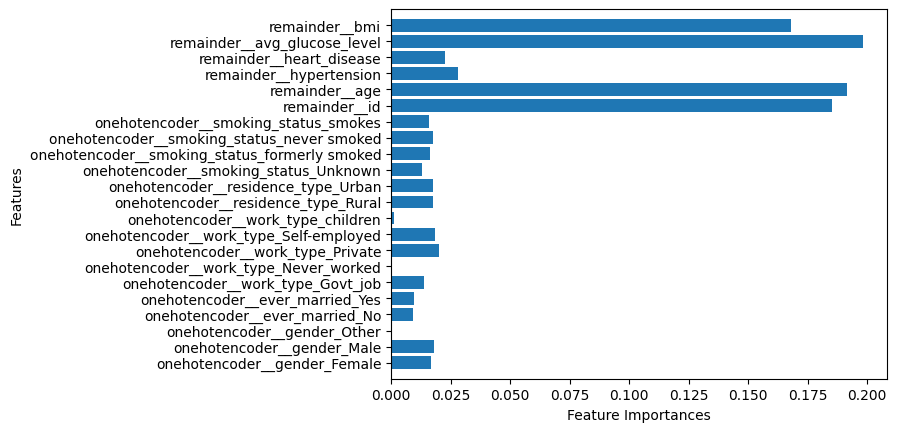

In [248]:
def plot_feature_importances(classifier, dataset, feat_names):
    n_feat = dataset.shape[1]
    plt.barh(range(n_feat), classifier.feature_importances_, align='center')
    plt.yticks(np.arange(n_feat), feat_names)
    plt.xlabel('Feature Importances')
    plt.ylabel('Features')
    plt.ylim(-1, n_feat)
    plt.show()


plot_feature_importances(SelectM.estimator_, df_train_enc, df_train_enc.columns)

### Modelling

Menggunakan 2 algoritme pembelajaran mesin untuk klasifikasi. Eksplorasi pengaturan parameter yang ada pada algoritme yang akan Anda gunakan, tidak terbatas pada 1-2 parameter saja supaya optimal (selain random_state). Silahkan bereksperimen untuk parameter seperti n_estimators, max_depth, dll. agar mendapat akurasi terbaik.

Ketentuan:

    Sub A:
    1. DecisionTreeClassifier(random_state= dua digit terakhir NPM terbesar dalam sub kelompok, max_depth=bebas,criterion='entropy')
    2. LogisticRegression(C=bebas, max_iter=10000, class_weight='balanced')`

    Sub B:
    1. K-Nearest Neighbors(n_neighbors=bebas, weights='distance')
    2. LinearSVC(C=bebas, class_weight='balanced')

Total ada 6 model yang harus diuji dengan rincian:

<table>
<thead>
  <tr>
    <th>Sub kelompok</th>
    <th>Scaler</th>
    <th>Feature Selection</th>
    <th>Model</th>
    <th>Kombinasi Pengujian Training Set dan Test Set</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>SelectKBest</td>
    <td>Decision Tree</td>
    <td>StandardScaler+DecisionTree | StandardScaler+SelectKBest+DecisionTree</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>SelectKBest</td>
    <td>LogisticRegression</td>
    <td>StandardScaler+LogisticRegression | StandardScaler+SelectKBest+LogisticRegression</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>RFE</td>
    <td>Decision Tree</td>
    <td>StandardScaler+RFE+DecisionTree</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>RFE</td>
    <td>LogisticRegression</td>
    <td>StandardScaler+RFE+LogisticRegression</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectPercentile</td>
    <td>KNN</td>
    <td>MinMaxScaler+KNN | MinMaxScaler+SelectPercentile+KNN</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectPercentile</td>
    <td>LinearSVC</td>
    <td>MinMaxScaler+LinearSVC | MinMaxScaler+SelectPercentile+LinearSVC</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectFromModel</td>
    <td>KNN</td>
    <td>MinMaxScaler+SelectPercentile+KNN</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectFromModel</td>
    <td>LinearSVC</td>
    <td>MinMaxScaler+SelectFromModel+LinearSVC</td>
  </tr>
</tbody>
</table>

In [249]:
#KNN MinMaxScaler + KNN

KNN_mmscaled = KNeighborsClassifier(n_neighbors=15, weights='distance')
KNN_mmscaled.fit(x_train_mmscaled, y_train)

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [250]:
#KNN MinMaxScaker + SelectPercentile + KNN

KNN_percentile = KNeighborsClassifier(n_neighbors=30, weights='distance')
KNN_percentile.fit(x_train_sp, y_train)

KNeighborsClassifier(n_neighbors=30, weights='distance')

In [251]:
#Linear SVC MinMaxScaler + LinearSVC

SVC_model_mmscaled = SVC(C=400, class_weight='balanced', gamma=100)
SVC_model_mmscaled.fit(x_train_mmscaled, y_train)

SVC(C=400, class_weight='balanced', gamma=100)

In [252]:
#Linear SVC MinMaxScaler + SelectPercentile + LinearSVC

SVC_model_percentile = SVC(C=400, class_weight='balanced', gamma=100)
SVC_model_percentile.fit(x_train_sp, y_train)

SVC(C=400, class_weight='balanced', gamma=100)

In [253]:
#KNN MinMaxScaler + SelectFromModel + KNN

KNN_selectFromModel = KNeighborsClassifier(n_neighbors=15, weights='distance')
KNN_selectFromModel.fit(x_train_smodel, y_train)


KNeighborsClassifier(n_neighbors=15, weights='distance')

In [254]:
#Linear SVC MinMaxScaler + SelectFromModel + LinearSVC

SVC_model_selectFromModel = SVC(C=300, class_weight='balanced', gamma=100)
SVC_model_selectFromModel.fit(x_train_smodel, y_train)

SVC(C=400, class_weight='balanced', gamma=100)

### Evaluasi Model

Bagian berikut berisi evaluasi model secara sederhana menggunakan metrik akurasi (fungsi score). Uji akurasi hasil pembelajaran pada train set dan test set.

In [255]:
print("Akurasi KNN pada train set Minmax Scaler : {:.3f}".format(KNN_mmscaled.score(x_train_mmscaled, y_train)))
print("Akurasi KNN pada test set Minmax Scaler  : {:.3f}".format(KNN_mmscaled.score(x_test_mmscaled, y_test)))


Akurasi KNN pada train set Minmax Scaler : 1.000
Akurasi KNN pada test set Minmax Scaler  : 0.950


In [256]:
print("Akurasi SVM pada train set Minmax Scaler :  {:.3f}".format(SVC_model_mmscaled.score(x_train_mmscaled, y_train)))
print("Akurasi SVM pada test set Minmax Scaler  :  {:.3f}".format(SVC_model_mmscaled.score(x_test_mmscaled, y_test)))

Akurasi SVM pada train set Minmax Scaler :  1.000
Akurasi SVM pada test set Minmax Scaler  :  0.947


In [257]:
print('Akurasi KNN pada train set Select Percentile : {:.3f} '.format(KNN_percentile.score(x_train_sp, y_train)))
print('Akurasi KNN pada test set Select Percentile  : {:.3f}'.format(KNN_percentile.score(x_test_sp, y_test)))

Akurasi KNN pada train set Select Percentile : 1.000 
Akurasi KNN pada test set Select Percentile  : 0.946


In [258]:
print("Akurasi SVM pada train set Select Percentile :  {:.3f}".format(SVC_model_percentile.score(X_train_sp, y_train)))
print("Akurasi SVM pada test set Select Percentile :  {:.3f}".format(SVC_model_percentile.score(X_test_sp, y_test)))

Akurasi SVM pada train set Select Percentile :  0.952
Akurasi SVM pada test set Select Percentile :  0.950


## Kesimpulan

Silahkan jawab pertanyaan berikut:

1. Apakah ada pengaruh penskalaan data pada dataset terhadap performa model-model machine learning? 

2. Apa saja feature-feature yang penting untuk membedakan antara pasien yang rawan terkena stroke dengan yang sehat? 

3. Model apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

1. Pengaruh penskalaan data pada dataset terhadap performa model-model memiliki pengaruh signifikan terhadap machine learning, dikarenakan pengskalaan data menuju ke proses mengubah skala nilai dalam dataset sehingga nilai tersebut memiliki rentan sama.
2. feature-feature penting untuk membedakan pasien rawan terkena stroke dengan yang sehat :
>>age, gender, hypertension, work_type, heart_disease, Residence_type, bmi, avg_glucose_level, smoking_status
3. Kinerja model pembelajaran mesin tidak menentukan model mana yang terbaik atau lebih baik dari yang lain. Hal ini karena kinerja model bergantung pada karakteristik data dan masalah yang akan dipecahkan. Namun dalam beberapa kasus, model KNN (K-Nearest Neighbor) memiliki beberapa keunggulan, yaitu:
- Pada data yang tidak terstruktur, model KNN memiliki tingkat akurasi yang baik
- Model KNN sederhana dan mudah dipahami, cocok untuk pemula pembelajaran mesin
- KNN dapat digunakan untuk dataset yang besar karena tidak memerlukan waktu pelatihan yang lama
- KNN dapat digunakan untuk masalah klasifikasi dan dapat dengan mudah diadaptasi untuk menangani data yang kompleks
- KNN tidak memerlukan pengaturan parameter yang rumit

